In [8]:
import torch
from torch import nn
import matplotlib.pyplot as plt

from ccn import ClausesGroup, Clause
from shapes import HalfPlane, Circle
from experiment import Experiment
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


### Define the shapes

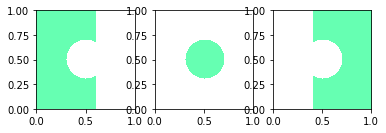

In [9]:
H0 = HalfPlane(1, 0, -0.6)
H1 = HalfPlane(-1, 0, 0.4) 
C = Circle(0.5, 0.5, 0.20)
shapes = [H0 & -C, C, H1 & -C]

fig, ax = plt.subplots(1, len(shapes))
for i, shape in enumerate(shapes):
  shape.plot(ax[i], full=True)
plt.show()


clauses = ClausesGroup([Clause('n0 n1'), Clause('n1 n2'), Clause('0 1 2')])
constraints1 = clauses.stratify('katz')
constraints2 = clauses.stratify('rev-katz')

In [11]:
model = torch.load('./models/midcircle-unconstained-6.4456e-05-1652226558.pth')
init = torch.rand(100000, 2)
preds = model(init).detach()
coherency = clauses.coherent_with(preds)
print(np.sum(coherency, axis=0))

[ 92048  95889 100000]


### Define the neural network

In [4]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 3),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.linear(x)
        return x

model = NeuralNetwork()
print(model)

NeuralNetwork(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Tanh()
    (2): Linear(in_features=4, out_features=3, bias=True)
    (3): Sigmoid()
  )
)


### Train and test the model

In [6]:
experiment = Experiment('midcircle', model, shapes, constraints1)
experiment.run(10, device='cpu')
experiment.save(dir='./models/')

Epoch 1, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1, 2})
loss: 0.764682 [    0/ 2500]
Test Error: 
 Accuracy: 49.0%, 87.8%, 48.3%
 Avg loss: 0.000278 

Epoch 2, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1, 2})
loss: 0.756242 [    0/ 2500]
Test Error: 
 Accuracy: 49.0%, 87.8%, 48.3%
 Avg loss: 0.000276 

Epoch 3, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1, 2})
loss: 0.748093 [    0/ 2500]
Test Error: 
 Accuracy: 49.0%, 87.8%, 48.3%
 Avg loss: 0.000274 

Epoch 4, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1, 2})
loss: 0.740253 [    0/ 2500]
Test Error: 
 Accuracy: 49.0%, 87.8%, 48.3%
 Avg loss: 0.000272 

Epoch 5, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1, 2})
loss: 0.732737 [    0/ 2500]
Test Error: 
 Accuracy: 49.0%, 87.8%, 48.3%
 Avg loss: 0.000270 

Epoch 6, Ratio 1.0
-----------------------
Created slicer for 1 modules (at